<a href="https://colab.research.google.com/github/Aditya-titus/Machine-learning/blob/main/Unpervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised learning

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

### 1) Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


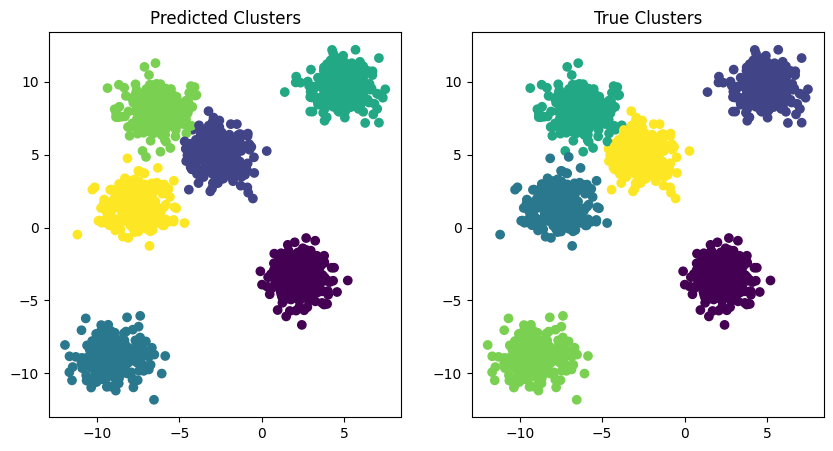

[[ 2.27858517 -3.37705842]
 [-2.61021341  4.93022891]
 [-9.0244111  -8.93819811]
 [ 4.90316136  9.62444898]
 [-6.36451479  8.00679515]
 [-7.57531599  1.51629033]]
3051.363513138328


In [18]:
# Generating random datasets
X,y = make_blobs(n_samples = 1500, cluster_std = 1.0, centers = 6)  # Makes an X dataset of 1500 x 2 values and y is 1500 x 1 of [0,1...6] as each label
km = KMeans(n_clusters = 6)

# Other clustering routines are
# AffinityPropagation()
# DBSCAN()

# Fit the KMeans model and predict clusters
predicted_clusters = km.fit_predict(X)

# Create a scatter plot for predicted clusters
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=predicted_clusters, cmap='viridis')
plt.title("Predicted Clusters")

# Create a scatter plot for true clusters
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title("True Clusters")

# Show the plots
plt.show()


center_mean = km.cluster_centers_
sum_squared = km.inertia_

print(center_mean)
print(sum_squared)

### 2) Principal Component Analysis

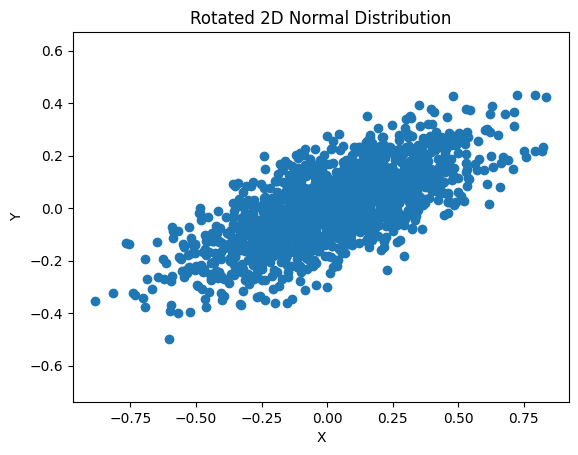

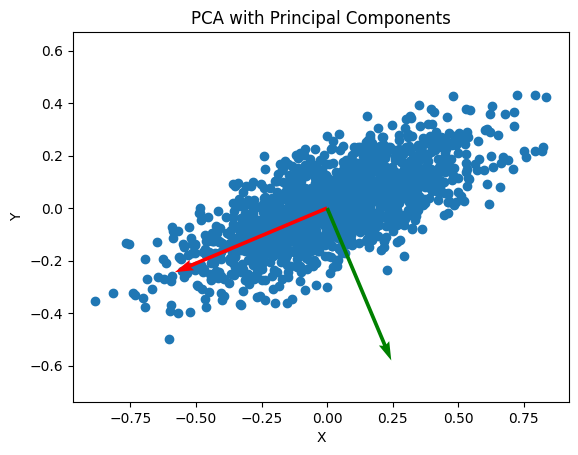

Angle of the first principal component: 22.83 degrees
Input angle: 23 degrees


In [31]:
def get_cov(sdx, sdy, rotangdeg):
  covar = np.array([[sdx**2,0],[0,sdy**2]])
  rotang = rotangdeg / 360 * 2 * np.pi
  rot_matrix = np.array([[np.cos(rotang), -np.sin(rotang)],[np.sin(rotang), np.cos(rotang)]]) #rotational matrix with angle defined above
  covar = np.matmul(np.matmul(rot_matrix, covar), rot_matrix.T)  #matmul is matrix multiplication
  return covar


# Generate 500 samples from the rotated 2D Normal Distribution
np.random.seed(0)
mean = [0, 0]
sdx = 0.3
sdy = 0.1
rotangdeg = 23
cov_matrix = get_cov(sdx, sdy, rotangdeg)
X = np.random.multivariate_normal(mean, cov_matrix, 1500)

# Plot the distribution
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')
plt.title('Rotated 2D Normal Distribution')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


# Perform PCA
pca = PCA(n_components=2)
pca.fit(X)

# Plot the data points
plt.scatter(X[:, 0], X[:, 1])

# Plot the first and second principal component directions
origin = [0, 0]
first_component = pca.components_[0]
second_component = pca.components_[1]

# Plot the first component direction in red
plt.quiver(*origin, *first_component, color='red', scale=3)

# Plot the second component direction in green
plt.quiver(*origin, *second_component, color='green', scale=3)

plt.axis('equal')
plt.title('PCA with Principal Components')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Calculate the angle of the first principal component in degrees
angle_pca = np.rad2deg(np.arctan2(first_component[1], first_component[0]))

# Correct for the potential 180-degree discrepancy
if angle_pca < 0:
    angle_pca += 180
else:
    angle_pca -= 180

print(f"Angle of the first principal component: {angle_pca:.2f} degrees")
print(f"Input angle: {rotangdeg} degrees")